In [1]:
import pandas as pd
import glob
from draw_graph import Scatter

In [2]:
text_excel = glob.glob('/Users/masaharu/Desktop/python_program_from_190111/data/190115/*.xlsx')
excel_data = pd.read_excel(text_excel[0]).reset_index()
all_area = excel_data['area']
center_area = excel_data['center']

In [3]:
#RNase_200mwの結果
text_csv = glob.glob('/Users/masaharu/Desktop/python_program_from_190111/data/190115/*.csv')
text_200mw = [text for text in text_csv if '200mw' in text]
text_200mw.sort()
count = 0
RNase_results = []
for csv in text_200mw:
    if 'all' in csv:
        data = pd.read_csv(csv, header = None)
        time = data[0][1:].astype(float)
        value_all = data[1][1:].astype(float)*all_area[count]
    elif 'center' in csv:
        data = pd.read_csv(csv, header = None)
        time = data[0][1:].astype(float)
        value_center = data[1][1:].astype(float)*center_area[count]
        value = (value_all-value_center)/(all_area[count]-center_area[count])
        ratio = value[-1:]/value[1]
        RNase_results.append(ratio)
        count += 1

In [4]:
RNase_results = pd.DataFrame(RNase_results)
RNase_results.columns = ['ratio']
RNase_df = pd.concat([excel_data, RNase_results.reset_index(drop = True)], axis = 1)

In [5]:
text_excel = glob.glob('/Users/masaharu/Desktop/python_program_from_190111/data/190115_2/*.xlsx')
excel_data = pd.read_excel(text_excel[0])
all_area = excel_data['area']
center_area = excel_data['center_area']

In [6]:
#control_200mwの結果
text_csv = glob.glob('/Users/masaharu/Desktop/python_program_from_190111/data/190115_2/*.csv')
text_200mw = [text for text in text_csv if '200mw' in text]
text_200mw.sort()
values = pd.DataFrame()
value_alls = pd.DataFrame()
value_centers = pd.DataFrame()
control_results = []
count = 0
for csv in text_200mw:
    if 'all' in csv:
        data = pd.read_csv(csv, header = None)
        time = data[0][1:].astype(float)
        value_all = data[1][1:].astype(float)*all_area[count]
        value_alls = pd.concat([value_alls, pd.DataFrame(value_all)], axis = 1)
    elif 'center' in csv:
        data = pd.read_csv(csv, header = None)
        time = data[0][1:].astype(float)
        value_center = data[1][1:].astype(float)*center_area[count]
        value_centers = pd.concat([value_centers, pd.DataFrame(value_center)], axis = 1)
        value = (value_all-value_center)/(all_area[count]-center_area[count])
        values = pd.concat([values, pd.DataFrame(value)], axis = 1)
        ratio = value[-1:]/value[1]
        control_results.append(ratio)
        count += 1

In [7]:
control_results = pd.DataFrame(control_results)
control_results.columns = ['ratio']
control_df = pd.concat([excel_data, control_results.reset_index(drop = True)], axis = 1)

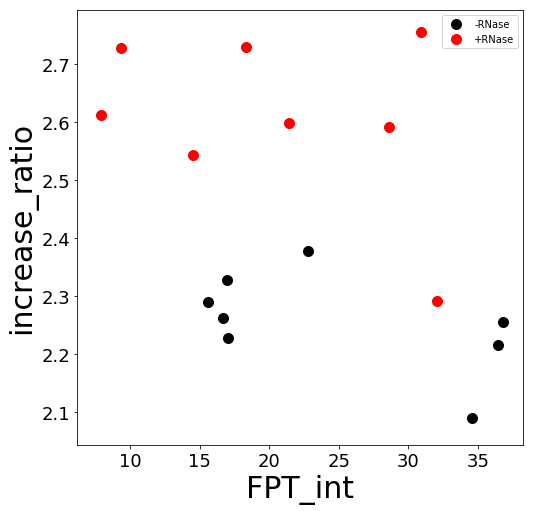

In [8]:
scatter = Scatter()
scatter.sct_plot_overwrite(control_df['mean'], 'FPT_int', control_df['ratio'], 'increase_ratio', RNase_df['mean'], RNase_df['ratio'], '100mw')